In [1]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

### Best Country

In [35]:
data_drama= pd.read_csv('mydramalist.csv')
data_drama

,id,url,title,type,country,director,alsoknownas,episodes,score,aired,duration,genres,tags,mainrole,supportrole
0,1,https://mydramalist.com/1-crows-zero,Crows Zero (2007),Movie,Japan,Takashi Miike,"Kurozu zero , Crows: Episode 0 , Crows Z...",NaN,"7.9 (scored by 4,739 users)",NaN,2 hr. 9 min.,"Action,Friendship,Thriller,Comedy,Crime,School...","Gang,AdaptedFromAManga,Yakuza,Delinquent,Takah...","Oguri Shun,Yamada Takayuki,","Yabe Kyosuke,Kiritani Kenta,Takahashi Tsutomu,..."
1,2,https://mydramalist.com/2-1-litre-no-namida,1 Litre no Namida (2005),Drama,Japan,"Murakami Shosuke, Kinoshita Takao","Ichi Rittoru no Namida , One Litre of Tears...",11.0,"9.0 (scored by 16,010 users)","Oct 11, 2005 - Dec 20, 2005",45 min.,"Romance,School,Drama,Family,Melodrama","BasedOnTrueStory,TerminalIllness,Tearjerker,Hi...","Sawajiri Erika,Nishikido Ryo,","Yakushimaru Hiroko,Jinnai Takanori,Narumi Riko..."
2,3,https://mydramalist.com/3-crows-zero-2,Crows Zero 2 (2009),Movie,Japan,Takashi Miike,"Crows Zero II , Kurozu zero II ,",NaN,"8.0 (scored by 3,431 users)",NaN,2 hr. 13 min.,"Action,Friendship,Thriller,Comedy,School,Youth","HighSchoolGraduate,TakahashiHiroshi,Teenager,T...","Oguri Shun,Yamada Takayuki,","Kaneko Nobuaki,Yabe Kyosuke,Abe Shinnosuke,Kir..."
3,4,https://mydramalist.com/4-volcano-high,Volcano High School (2001),Movie,South Korea,NaN,"Hwasango , Hwasan Highschool , Volcano High",NaN,6.8 (scored by 724 users),NaN,2 hr. 1 min.,"Action,Friendship,Comedy,School,MartialArts,Fa...","PowerStruggle,HighSchool,TransferStudent,Marti...","Jang Hyuk,Kim Soo Ro,","Shin Min Ah,Kwon Sang Woo,Gong Hyo Jin,Jung Sa..."
4,5,https://mydramalist.com/5-the-client,The Client (2011),Movie,South Korea,NaN,Uiroein,NaN,7.9 (scored by 839 users),NaN,2 hr. 3 min.,"Thriller,Mystery,Law,Investigation","MysteriousFigure,MysteriousCharacter,CriminalI...","Ha Jung Woo,Park Hee Soon ,Jang Hyuk,","Hwang Byung Kook,Park Sung Yun,Min Bok Gi,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,5191,https://mydramalist.com/5191-term-of-validity-...,Term of Validity for Love (2014),Drama,China,NaN,"Validity for love , 사랑유효기간 , You Xiao ...",32.0,7.5 (scored by 8 users),2014 - ?,NaN,"Comedy,Romance",NaN,"Noh Min Woo,Li Qin,Sherman Ye,Zhou Ting Wei,","Kevin Wang,Yao Yu Xin,"
559,5213,https://mydramalist.com/5213-courageous-love,Courageous Love (2012),Movie,China,NaN,Yong Gan Ai,NaN,7.1 (scored by 30 users),NaN,20 min.,"Action,Adventure,Thriller",NaN,"Tong Li Ya,",NaN
560,5215,https://mydramalist.com/5215-the-ugly-duckling,The Ugly Duckling (2012),Movie,South Korea,NaN,Miwoonorisaeggi,NaN,5.5 (scored by 2 users),NaN,1 hr. 35 min.,Drama,NaN,"Oh Dal Soo,Kim Jun Goo,","Kim Sung Ryung,Song Yool Kyu,Jung Ye Jin,Hwang..."
561,5220,https://mydramalist.com/5220-resident5-nin-no-...,Resident - 5-nin no Kenshui (2012),Drama,Japan,"Takanari Mahoko, Yoshida Akio","Resident ~Go-nin no Kenshui , Resident~5-ni...",10.0,7.5 (scored by 228 users),"Oct 18, 2012 - Dec 20, 2012",54 min.,"Drama,Medical","NEWS(Band),TraineeDoctor,Colleagues,Doctor,Hos...","Naka Riisa,Omasa Aya,Hayashi Kento,Masuda Taka...","Ozawa Yukiyoshi,"


In [36]:
data_drama

,id,url,title,type,country,director,alsoknownas,episodes,score,aired,duration,genres,tags,mainrole,supportrole
0,1,https://mydramalist.com/1-crows-zero,Crows Zero (2007),Movie,Japan,Takashi Miike,"Kurozu zero , Crows: Episode 0 , Crows Z...",NaN,"7.9 (scored by 4,739 users)",NaN,2 hr. 9 min.,"Action,Friendship,Thriller,Comedy,Crime,School...","Gang,AdaptedFromAManga,Yakuza,Delinquent,Takah...","Oguri Shun,Yamada Takayuki,","Yabe Kyosuke,Kiritani Kenta,Takahashi Tsutomu,..."
1,2,https://mydramalist.com/2-1-litre-no-namida,1 Litre no Namida (2005),Drama,Japan,"Murakami Shosuke, Kinoshita Takao","Ichi Rittoru no Namida , One Litre of Tears...",11.0,"9.0 (scored by 16,010 users)","Oct 11, 2005 - Dec 20, 2005",45 min.,"Romance,School,Drama,Family,Melodrama","BasedOnTrueStory,TerminalIllness,Tearjerker,Hi...","Sawajiri Erika,Nishikido Ryo,","Yakushimaru Hiroko,Jinnai Takanori,Narumi Riko..."
2,3,https://mydramalist.com/3-crows-zero-2,Crows Zero 2 (2009),Movie,Japan,Takashi Miike,"Crows Zero II , Kurozu zero II ,",NaN,"8.0 (scored by 3,431 users)",NaN,2 hr. 13 min.,"Action,Friendship,Thriller,Comedy,School,Youth","HighSchoolGraduate,TakahashiHiroshi,Teenager,T...","Oguri Shun,Yamada Takayuki,","Kaneko Nobuaki,Yabe Kyosuke,Abe Shinnosuke,Kir..."
3,4,https://mydramalist.com/4-volcano-high,Volcano High School (2001),Movie,South Korea,NaN,"Hwasango , Hwasan Highschool , Volcano High",NaN,6.8 (scored by 724 users),NaN,2 hr. 1 min.,"Action,Friendship,Comedy,School,MartialArts,Fa...","PowerStruggle,HighSchool,TransferStudent,Marti...","Jang Hyuk,Kim Soo Ro,","Shin Min Ah,Kwon Sang Woo,Gong Hyo Jin,Jung Sa..."
4,5,https://mydramalist.com/5-the-client,The Client (2011),Movie,South Korea,NaN,Uiroein,NaN,7.9 (scored by 839 users),NaN,2 hr. 3 min.,"Thriller,Mystery,Law,Investigation","MysteriousFigure,MysteriousCharacter,CriminalI...","Ha Jung Woo,Park Hee Soon ,Jang Hyuk,","Hwang Byung Kook,Park Sung Yun,Min Bok Gi,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,5191,https://mydramalist.com/5191-term-of-validity-...,Term of Validity for Love (2014),Drama,China,NaN,"Validity for love , 사랑유효기간 , You Xiao ...",32.0,7.5 (scored by 8 users),2014 - ?,NaN,"Comedy,Romance",NaN,"Noh Min Woo,Li Qin,Sherman Ye,Zhou Ting Wei,","Kevin Wang,Yao Yu Xin,"
559,5213,https://mydramalist.com/5213-courageous-love,Courageous Love (2012),Movie,China,NaN,Yong Gan Ai,NaN,7.1 (scored by 30 users),NaN,20 min.,"Action,Adventure,Thriller",NaN,"Tong Li Ya,",NaN
560,5215,https://mydramalist.com/5215-the-ugly-duckling,The Ugly Duckling (2012),Movie,South Korea,NaN,Miwoonorisaeggi,NaN,5.5 (scored by 2 users),NaN,1 hr. 35 min.,Drama,NaN,"Oh Dal Soo,Kim Jun Goo,","Kim Sung Ryung,Song Yool Kyu,Jung Ye Jin,Hwang..."
561,5220,https://mydramalist.com/5220-resident5-nin-no-...,Resident - 5-nin no Kenshui (2012),Drama,Japan,"Takanari Mahoko, Yoshida Akio","Resident ~Go-nin no Kenshui , Resident~5-ni...",10.0,7.5 (scored by 228 users),"Oct 18, 2012 - Dec 20, 2012",54 min.,"Drama,Medical","NEWS(Band),TraineeDoctor,Colleagues,Doctor,Hos...","Naka Riisa,Omasa Aya,Hayashi Kento,Masuda Taka...","Ozawa Yukiyoshi,"


In [37]:
data_drama2= data_drama[['country','score']]
data_drama2.head()

,country,score
0,Japan,"7.9 (scored by 4,739 users)"
1,Japan,"9.0 (scored by 16,010 users)"
2,Japan,"8.0 (scored by 3,431 users)"
3,South Korea,6.8 (scored by 724 users)
4,South Korea,7.9 (scored by 839 users)


In [38]:
def split_score(x):
    try :
        return float(x.strip().split(' ')[0])
    except:
        return None

In [39]:
data_drama2['score']= data_drama2[['score']].applymap(split_score)

c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
data_drama2.dropna(inplace=True)

c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [41]:
data_drama2

,country,score
0,Japan,7.9
1,Japan,9.0
2,Japan,8.0
3,South Korea,6.8
4,South Korea,7.9
...,...,...
557,Hong Kong,6.3
558,China,7.5
559,China,7.1
560,South Korea,5.5


array([<AxesSubplot:ylabel='score'>], dtype=object)

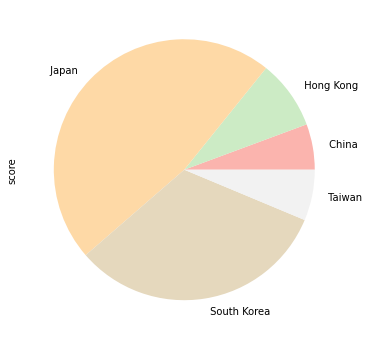

In [42]:
data_drama2.groupby('country').sum().plot(kind='pie', subplots=True, figsize=(6,6), cmap='Pastel1', legend=False)

### Best Actor 

In [45]:
data_drama= pd.read_csv('top100_kdrama.csv')
data_drama

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,"Netflix, Netflix, Netflix, Netflix",52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Father-Son Relationship, Uncle-Nephew ...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"tvN, Netflix, Netflix, Netflix, Netflix",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Doctor, Multiple Mains, Slo...",#2,9.1
2,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...",#3,9.1
3,My Mister,2018,"Mar 21, 2018 - May 17, 2018","Wednesday, Thursday",16,tvN,1 hr. 17 min.,15+ - Teens 15 or older,Park Dong Hoon is a middle-aged engineer who i...,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...","Business, Psychological, Life, Drama, Family","Nice Male Lead, Strong Female Lead, Hardship, ...",#4,9.1
4,Prison Playbook,2017,"Nov 22, 2017 - Jan 18, 2018","Wednesday, Thursday",16,"tvN, Netflix, Netflix, Netflix, Netflix",1 hr. 32 min.,15+ - Teens 15 or older,"Kim Je Hyuk, a famous baseball player, is arre...","Park Hae Soo, Jung Kyung Ho, Krystal, Im Hwa Y...","Comedy, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",#5,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Thirty But Seventeen,2018,"Jul 23, 2018 - Sep 18, 2018","Monday, Tuesday",32,SBS,35 min.,15+ - Teens 15 or older,"Woo Seo Ri, a violin prodigy at 17 who was abo...","Shin Hae Sun, Yang Se Jong, Ahn Hyo Seop, Ye J...","Music, Mystery, Comedy, Romance, Drama","Cohabitation, Healing, First Love, Coma, Tragi...",#96,8.5
96,Vagabond,2019,"Sep 20, 2019 - Nov 23, 2019","Friday, Saturday",16,"SBS, Netflix, Netflix, Netflix, Netflix",1 hr. 10 min.,15+ - Teens 15 or older,Cha Dal Gun becomes an awakened tiger in the f...,"Lee Seung Gi, Bae Suzy, Shin Sung Rok, Baek Y...","Action, Thriller, Mystery, Crime, Melodrama","Plane Crash, Revenge, National Intelligence Se...",#97,8.5
97,Be Melodramatic,2019,"Aug 9, 2019 - Sep 28, 2019","Friday, Saturday",16,"jTBC, Viki",1 hr. 5 min.,15+ - Teens 15 or older,"Im Jin Joo, Lee Eun Jung, and Hwang Han Joo ar...","Chun Woo Hee, Jeon Yeo Bin, Han Ji Eun, Ahn Ja...","Friendship, Comedy, Romance, Life, Melodrama","Multiple Mains, Sismance, Strong Female Lead, ...",#98,8.5
98,Mad for Each Other,2021,"May 24, 2021 - Jun 21, 2021","Monday, Tuesday, Wednesday",13,"Daum Kakao TV, Netflix, Netflix, Netflix, ...",35 min.,15+ - Teens 15 or older,About two people with their own painful storie...,"Oh Yeon Seo, Jung Woo, Lee Soo Hyun, Ahn Woo Y...","Comedy, Romance, Drama","Trauma, Enemies To Lovers, Healing, Character ...",#99,8.5


In [46]:
# data_drama3= data_drama[['mainrole','supportrole']]
data_drama3= data_drama[['Cast']]
data_drama3

,Cast
0,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju..."
1,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim..."
2,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ..."
3,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ..."
4,"Park Hae Soo, Jung Kyung Ho, Krystal, Im Hwa Y..."
...,...
95,"Shin Hae Sun, Yang Se Jong, Ahn Hyo Seop, Ye J..."
96,"Lee Seung Gi, Bae Suzy, Shin Sung Rok, Baek Y..."
97,"Chun Woo Hee, Jeon Yeo Bin, Han Ji Eun, Ahn Ja..."
98,"Oh Yeon Seo, Jung Woo, Lee Soo Hyun, Ahn Woo Y..."


In [47]:
data_drama3.dropna(inplace=True)

c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [48]:
def into_list(x):
    genre_raw= x.split(',')[:-1]
    genre_list = []
    for genre in genre_raw:
        genre_list.append(genre[:].strip())

    return genre_list

In [49]:
mainrole_list= list(data_drama3['Cast'].apply(into_list))
mainrole_list[1]

# na_action{None, ‘ignore’}, default None
# If ‘ignore’, propagate NaN values, without passing them to func.


['Jo Jung Suk',
 'Yoo Yeon Seok',
 'Jung Kyung Ho',
 'Kim Dae Myung',
 'Jeon Mi Do']

In [50]:
te= TransactionEncoder()
te_role= te.fit(mainrole_list).transform(mainrole_list)

data_drama3_role_count= pd.DataFrame(te_role, columns=te.columns_)
data_drama3_role_count= data_drama3_role_count.astype('int')

In [51]:
data_drama3_role_count= data_drama3_role_count.transpose()

In [52]:
data_drama3_role_count['Sum']= data_drama3_role_count[list(data_drama3_role_count)].sum(axis=1)

In [53]:
data_drama3_role_count= data_drama3_role_count.iloc[:,-1]

In [54]:
data_drama3_role_count= pd.DataFrame(data_drama3_role_count.sort_values(ascending=False))

In [60]:
data_drama3_role_count

,Sum
Kim Ji Won,5
Lee Joon Hyuk,5
Song Joong Ki,5
Jung Kyung Ho,4
Park Seo Joon,4
...,...
Ko Jun,1
Krystal,1
Kwak Shi Yang,1
Kwon Na Ra,1


array([<AxesSubplot:ylabel='Sum'>], dtype=object)

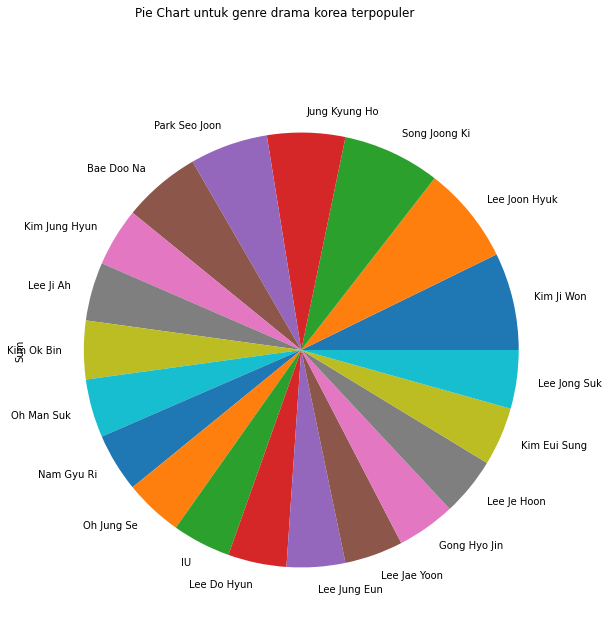

In [56]:
data_drama3_role_count.head(20).plot(kind='pie', subplots=True, figsize=(30,10), title='Pie Chart untuk genre drama korea terpopuler', legend=False)

### Finding actor's dramas

In [57]:
def actors_find_dramas(x, name):
    if name in x:
        return data_drama[data_drama['Cast']==x]['Name'].sum()
    else:
        return None

In [64]:
def listing_actors(actor_name):
    find_actor_drama= data_drama[['Cast']].applymap(lambda x: actors_find_dramas(x, actor_name)).dropna()
    temp= find_actor_drama.sort_values(by='Cast').rename(columns={'Cast':('')}).reset_index(drop=True)
    return temp

Masukkan nama aktor

In [72]:
# actor_name= input()
actor_name= 'Lee Jong Suk'

In [73]:
listing_actors(actor_name)

,
0,I Hear Your Voice
1,W
2,While You Were Sleeping


In [65]:
# def arr_to_string_with_commas(x):
#     x= x.values
    
#     temp_string= ''
#     for i in x:
#         if(i==x[-1]):
#             temp_string= temp_string+i
#         else:
#             temp_string= temp_string+i+", "
            
#     return temp_string

In [66]:
# list_temp= temp.apply(arr_to_string_with_commas).to_string().strip()

In [70]:
# column_movie_list= list()

# for i in range(len(data_drama3_role_count)):
#     temp_list= listing_actors(data_drama3_role_count.index[i])
# #     temp_list= temp_list.apply(arr_to_string_with_commas)
#     column_movie_list.append(temp_list)

# data_drama3_role_count['Movie List']= column_movie_list
# data_drama3_role_count.rename(columns={'Sum':'Movie Count'}, inplace=True)
# data_drama3_role_count